
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [128]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


import warnings
warnings.filterwarnings("ignore")

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [198]:
my_cols = pd.read_csv('./data/heart_disease/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/heart_disease/processed_cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [130]:
# Exploramos un poco las features
df = pd.DataFrame(data=my_data)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.665563,4.698675,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.935142,1.972889,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  num       302 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [132]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Figure size 1000x1000 with 0 Axes>

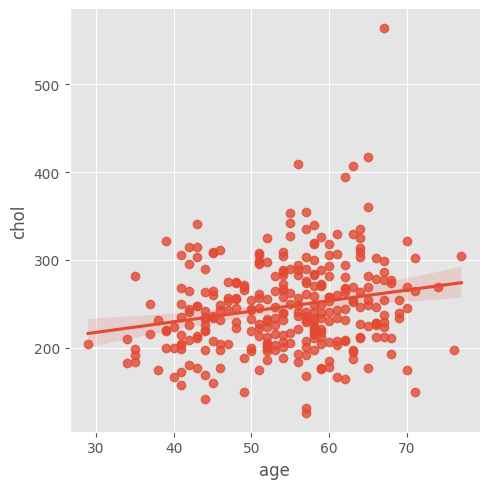

In [133]:
# sns.displot(hue='age',x='chol',data=my_data, palette='Set2', kind='kde')
# plt.show()

plt.figure(figsize=(10,10))
sns.lmplot(x='age',y='chol',data=my_data)
plt.show()

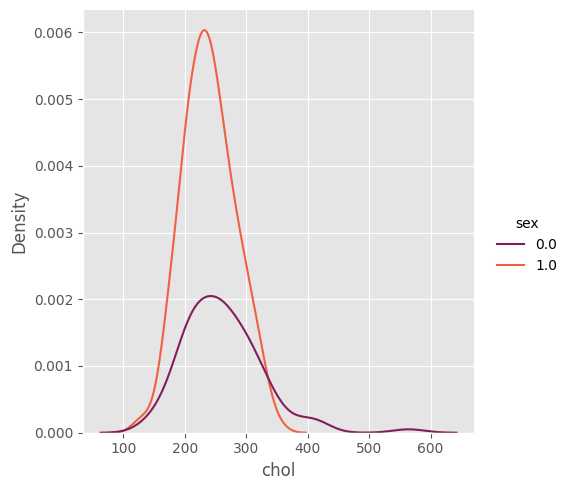

In [134]:
sns.displot(x='chol',hue='sex',data=my_data,palette='rocket',kind="kde")
plt.show()

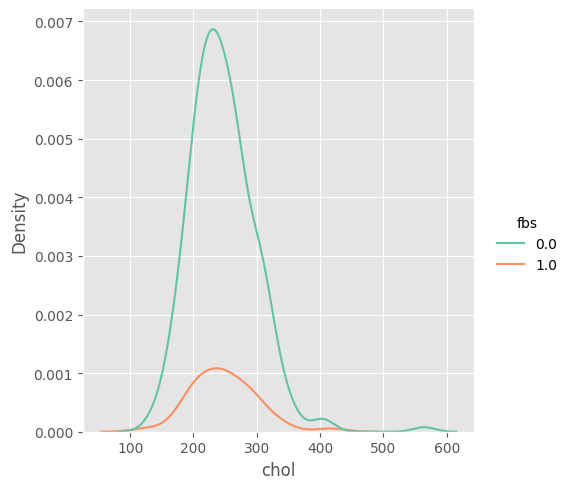

In [135]:
sns.displot(hue='fbs',x='chol',data=my_data,palette='Set2', kind='kde')
plt.show()

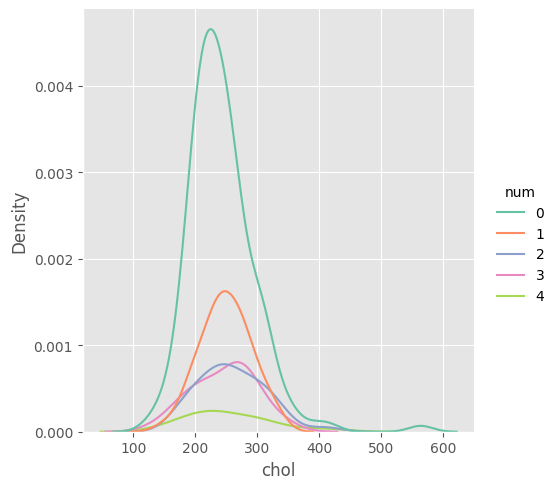

In [136]:
sns.displot(hue='num',x='chol',data=my_data,palette='Set2', kind='kde')
plt.show()

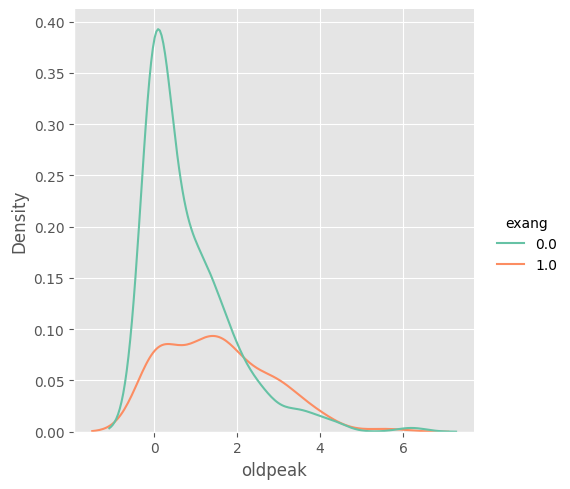

In [137]:
sns.displot(hue='exang',x='oldpeak',data=my_data,palette='Set2', kind='kde')
plt.show()

### Estudio de correlación entre datos

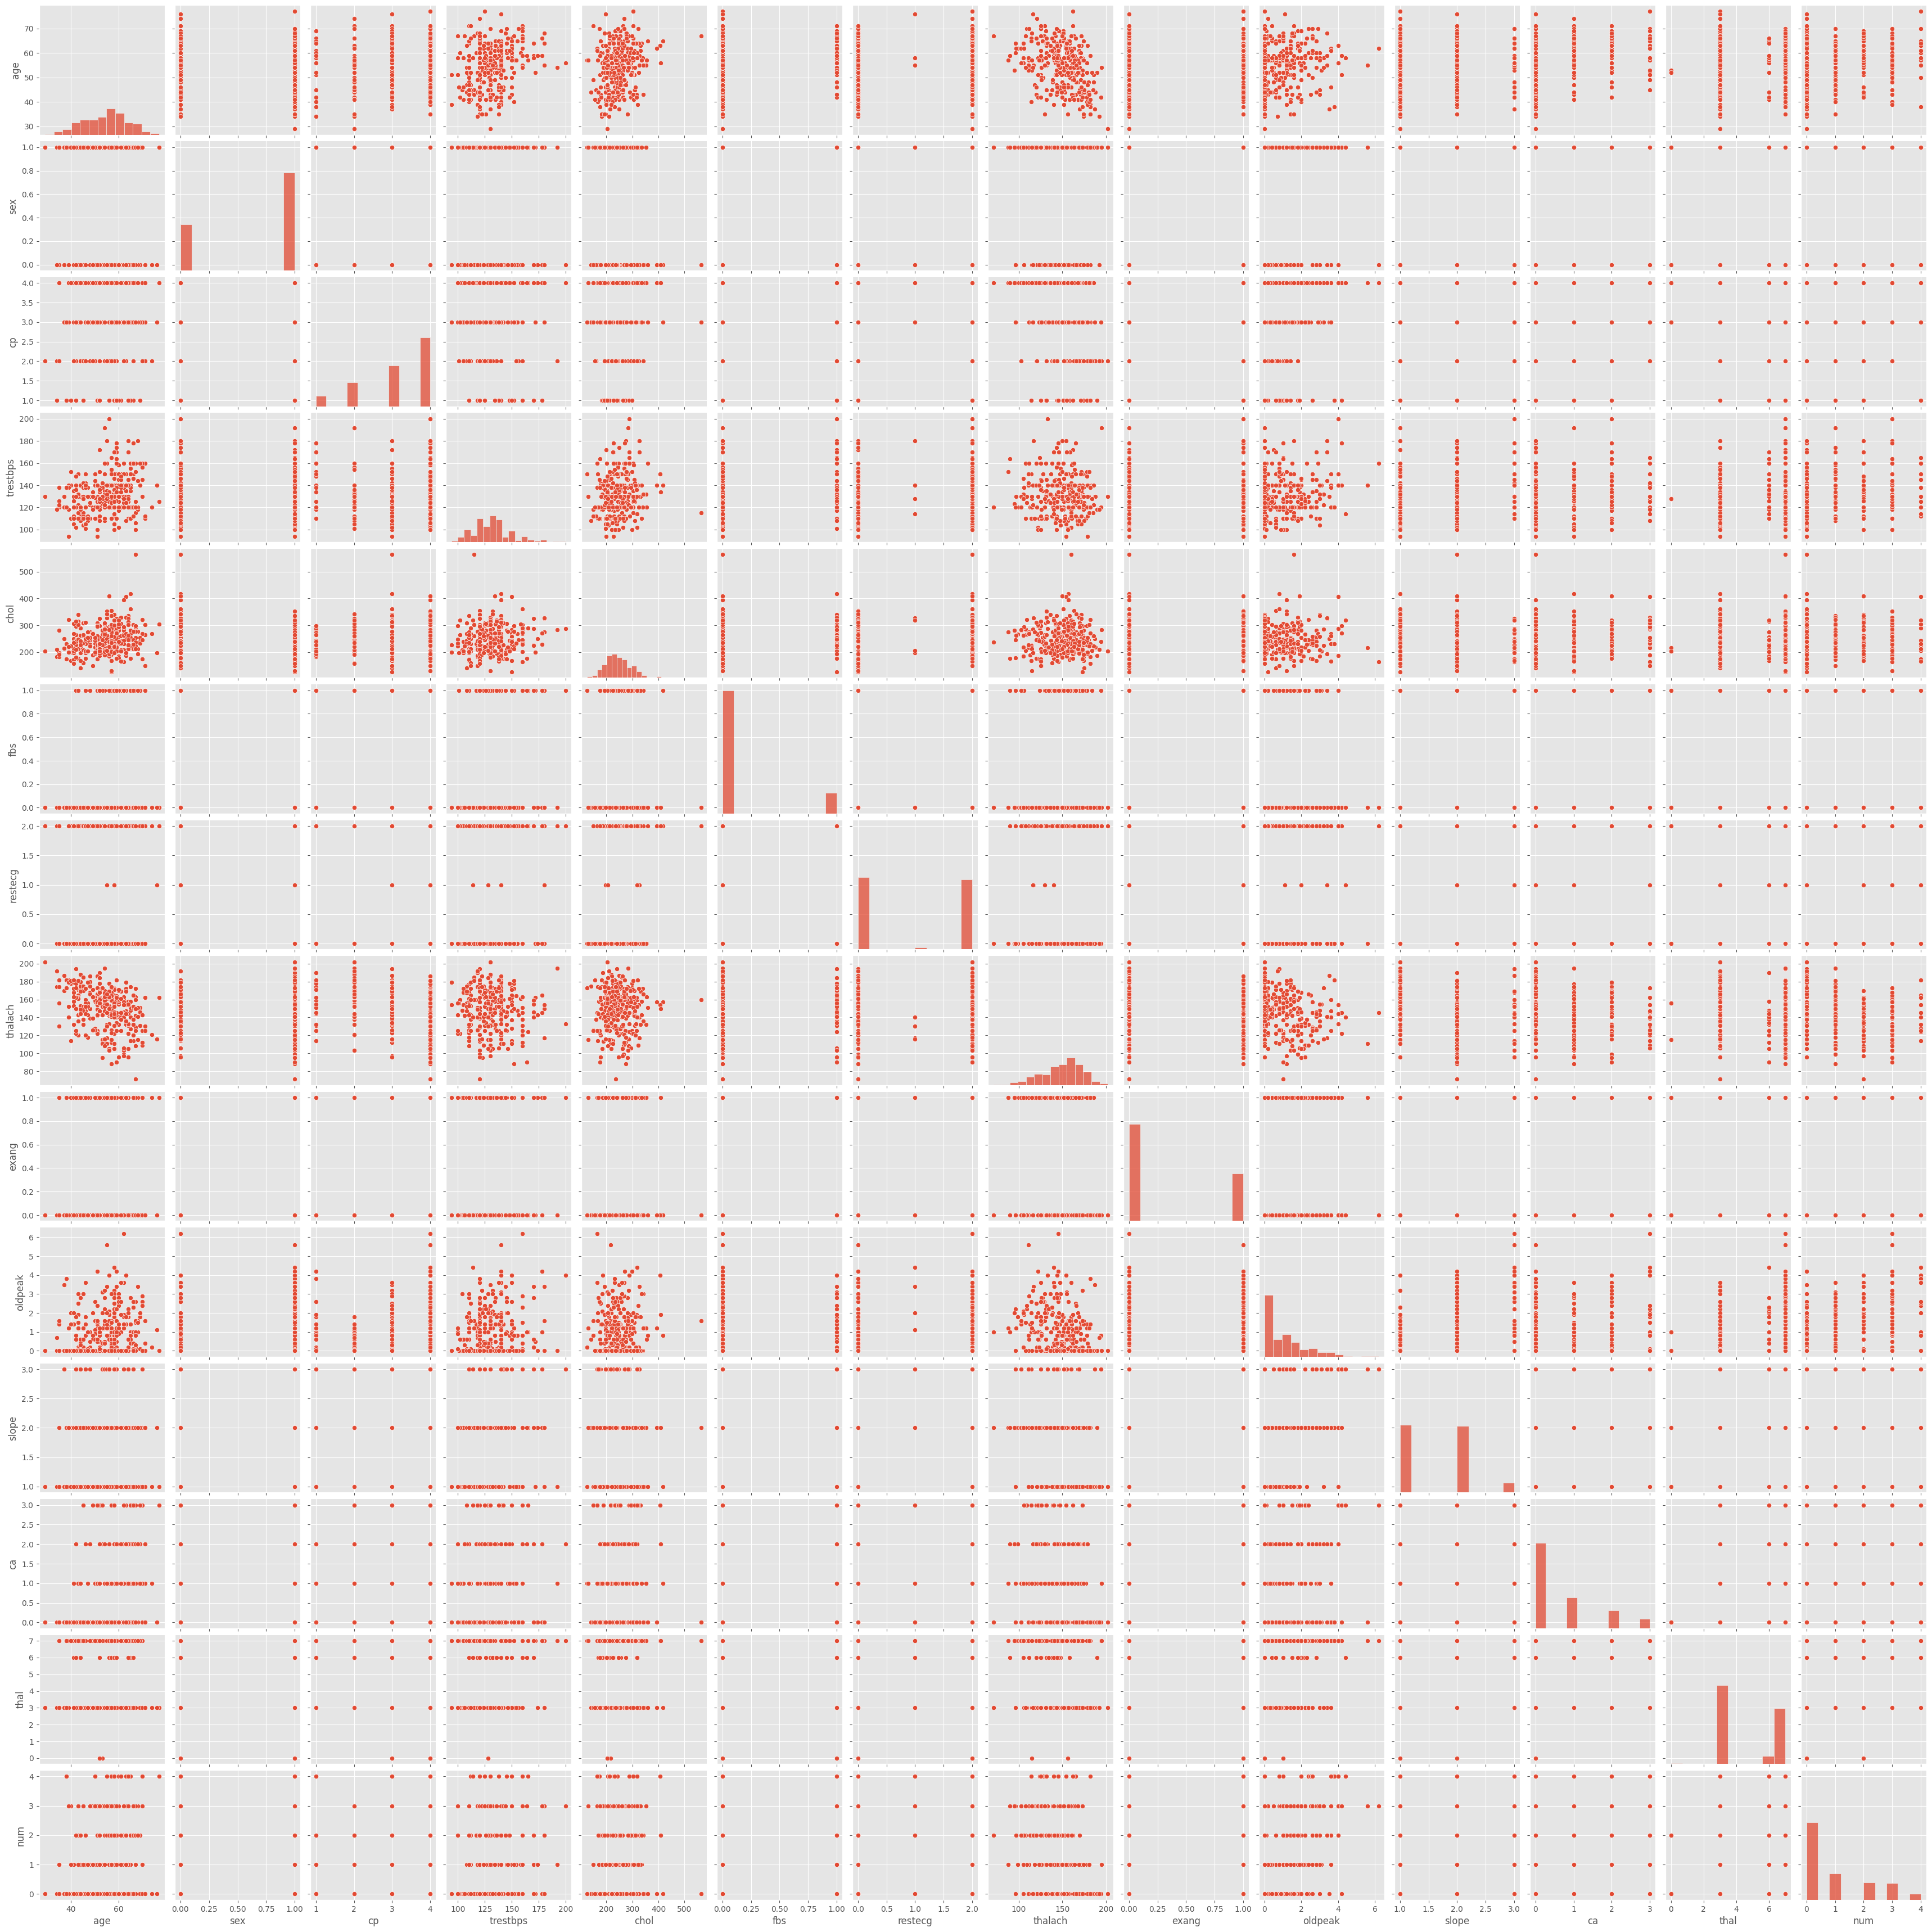

In [138]:
sns.pairplot(my_data)

In [139]:
corr_matrix = my_data.corr(method='spearman')

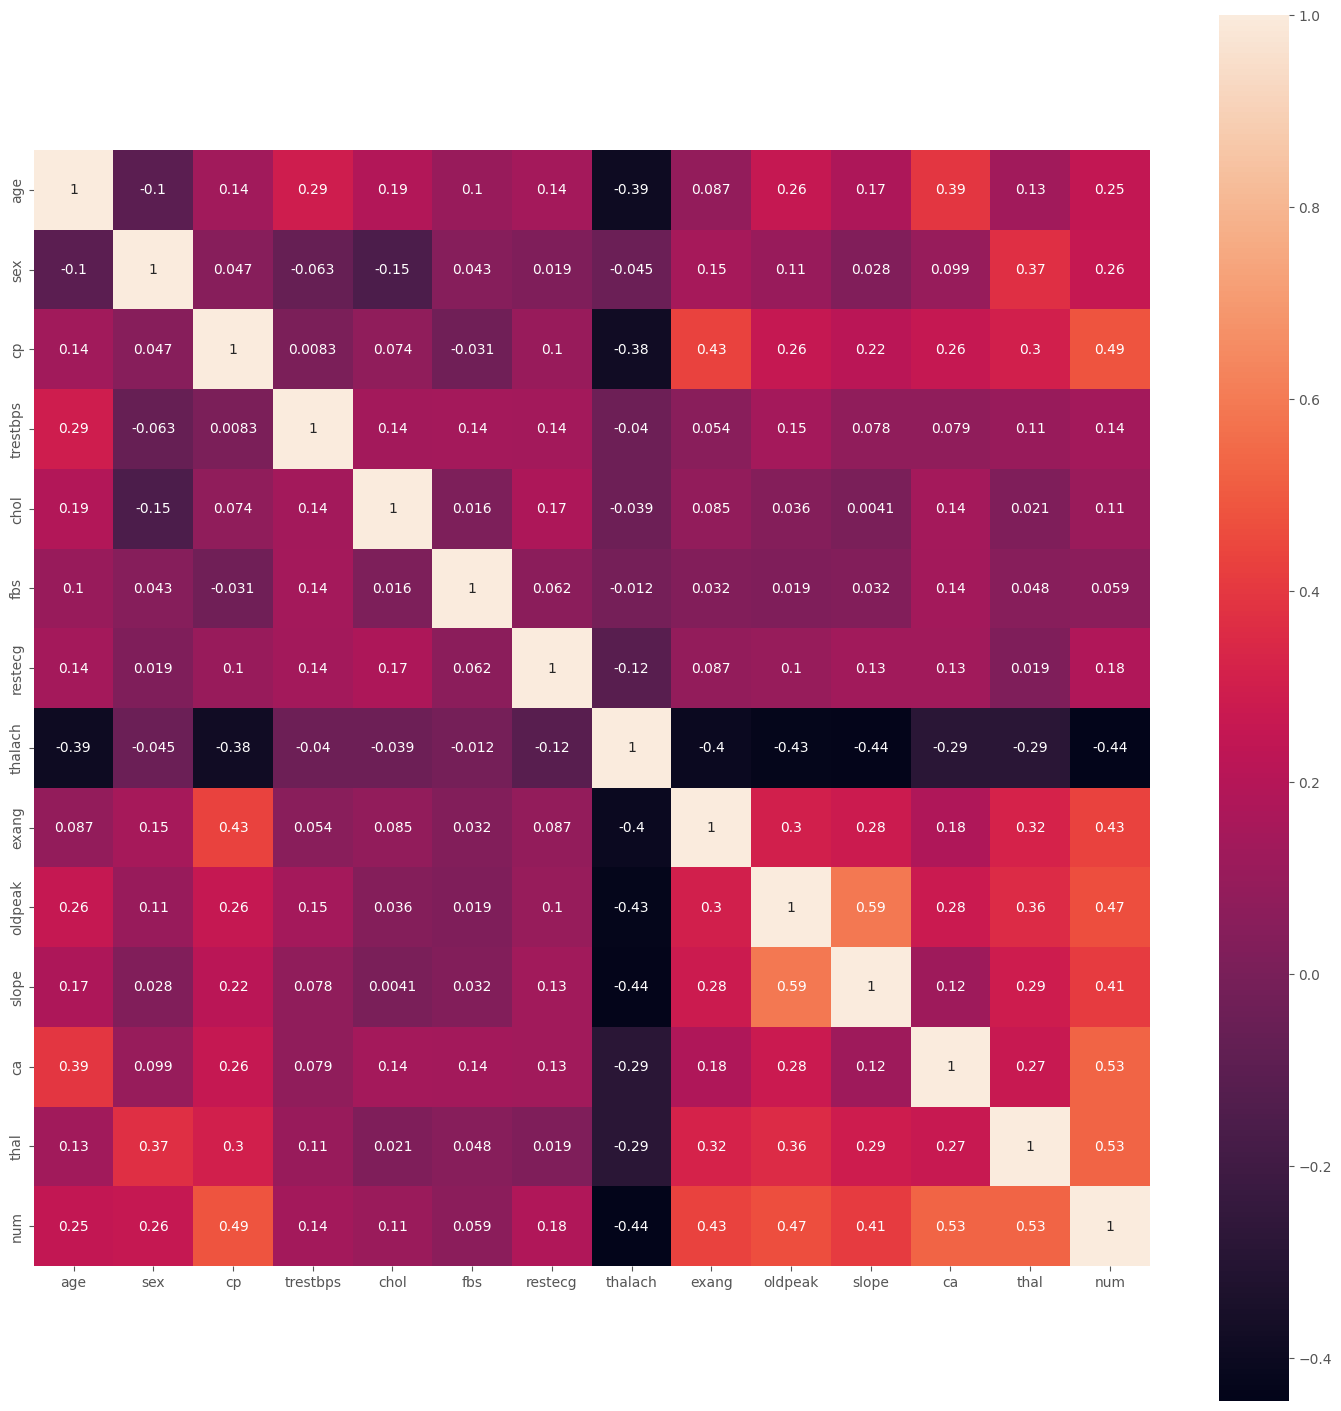

In [140]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax,
    annot=True
)

ax.tick_params(labelsize = 10)

In [141]:
# Se eliminan los datos que tengan correlación menor a 0.3 con respecto al resto
data2 = my_data.drop(columns=['age','sex','trestbps','chol','fbs','restecg','thalach'])

In [142]:
data2.head()

,cp,exang,oldpeak,slope,ca,thal,num
0,4.0,1.0,1.5,2.0,3.0,3.0,2
1,4.0,1.0,2.6,2.0,2.0,7.0,1
2,3.0,0.0,3.5,3.0,0.0,3.0,0
3,2.0,0.0,1.4,1.0,0.0,3.0,0
4,2.0,0.0,0.8,1.0,0.0,3.0,0


### Split Data

In [319]:
# División de los datos en train y test

X = my_data.drop(columns='num')
y = my_data['num']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [320]:
X_train.shape

(211, 13)

In [321]:
y_train.shape

(211, 1)

In [322]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [323]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Colocamos las features de X a escalar
x_scale = ['exang','oldpeak','slope']

# Escalamos el dataset de entrenamiento haciendo un fit y transform del scaler
X_train[x_scale] = x_scaler.fit_transform(X_train[x_scale])
y_train = y_scaler.fit_transform(y_train)

# Transformamos el dataset de test (no hacemos fit)
X_test[x_scale] = x_scaler.transform(X_test[x_scale])
y_test = y_scaler.transform(y_test)

In [324]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,2.110000e+02,2.110000e+02,2.110000e+02,211.000000,211.000000
mean,54.834123,0.682464,3.161137,131.194313,247.274882,0.137441,0.952607,147.734597,-6.103596e-17,1.010250e-16,4.209376e-17,0.706161,4.696682
std,9.088243,0.466625,0.957480,17.737911,52.472036,0.345131,0.998871,23.340455,1.002378e+00,1.002378e+00,1.002378e+00,0.985084,1.988763
min,29.000000,0.000000,1.000000,94.000000,149.000000,0.000000,0.000000,71.000000,-6.821127e-01,-9.513842e-01,-9.774199e-01,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.500000,0.000000,0.000000,132.000000,-6.821127e-01,-9.513842e-01,-9.774199e-01,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,152.000000,-6.821127e-01,-2.250447e-01,6.593706e-01,0.000000,3.000000
75%,61.500000,1.000000,4.000000,140.000000,275.500000,0.000000,2.000000,163.000000,1.466033e+00,6.828795e-01,6.593706e-01,1.000000,7.000000
max,77.000000,1.000000,4.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.466033e+00,4.677746e+00,2.296161e+00,3.000000,7.000000


In [325]:
modelo = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

In [326]:
modelo.fit(X = X_train, y = y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [327]:
modelo.steps[1][1].n_features_in_

13

Text(0.5, 1.0, 'Parámetros del modelo')

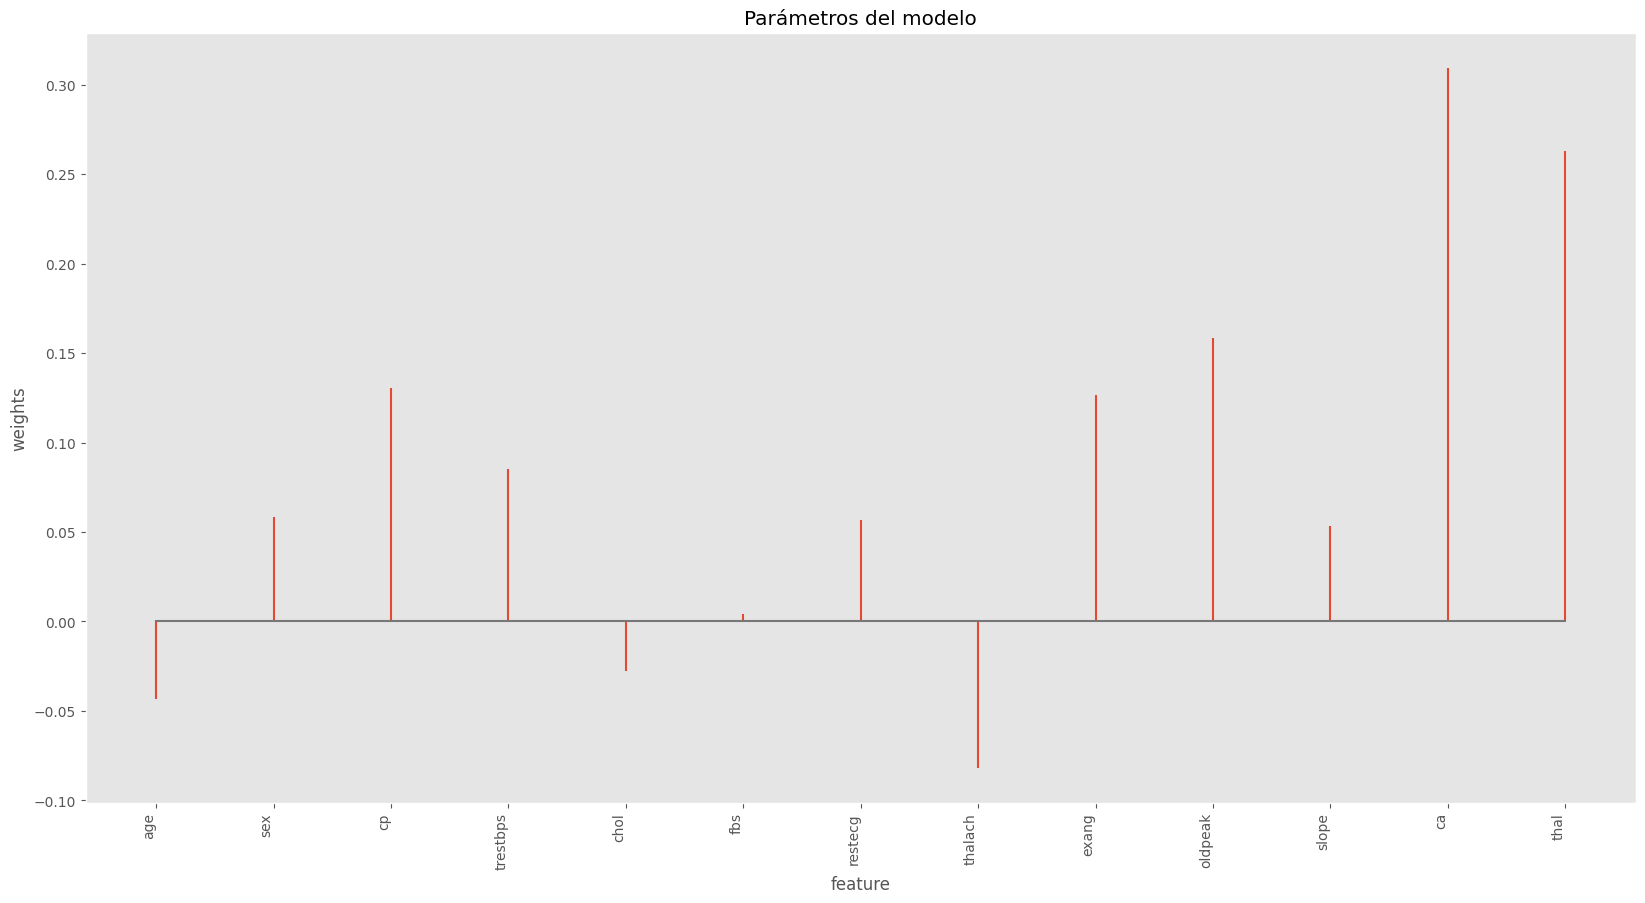

In [328]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.steps[1][1].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [329]:
# Predicciones test

predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 0.79390879, -0.76657555, -0.23380872,  0.68027108,  0.29975844,
        0.4264545 ,  1.53129667, -0.3186983 , -0.63711631, -0.78681057])

In [330]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )

print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 0.623523605978895


In [331]:
R2 = metrics.r2_score(y_test, predicciones)
R2

0.584168950112262

In [332]:
(y_test - predicciones.reshape(y_test.shape)).shape

(91, 1)

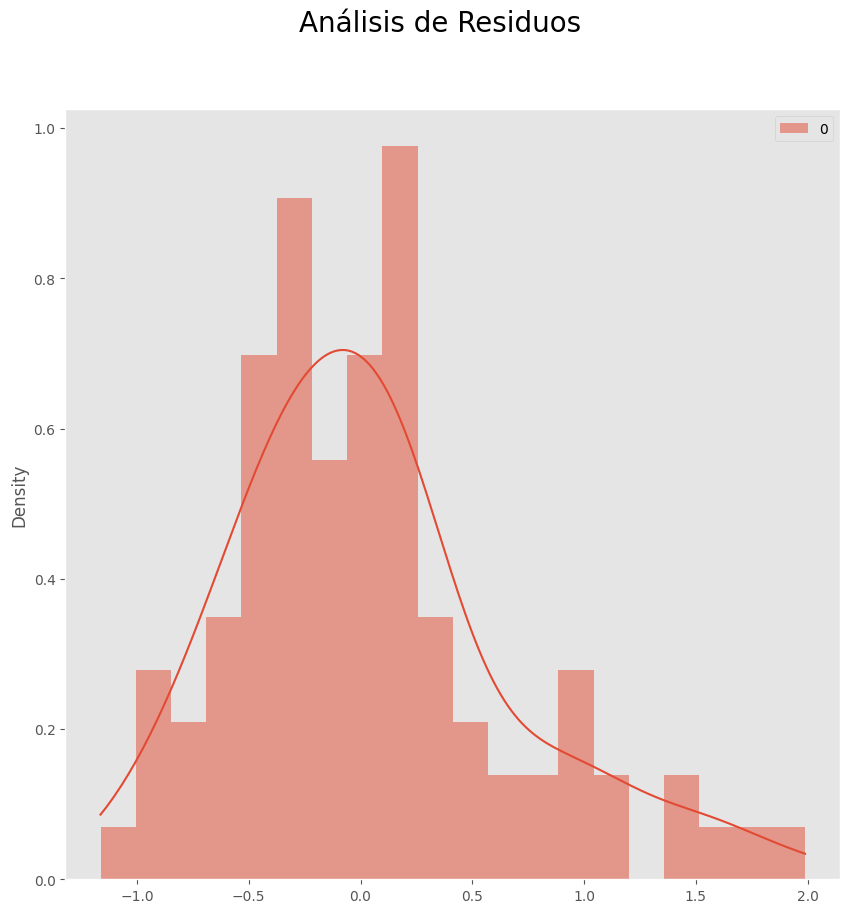

In [333]:
fig = plt.figure(figsize=(10,10))
  
sns.histplot((y_test - predicciones.reshape(y_test.shape)), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)    
plt.show()

In [334]:
y_test.shape

(91, 1)

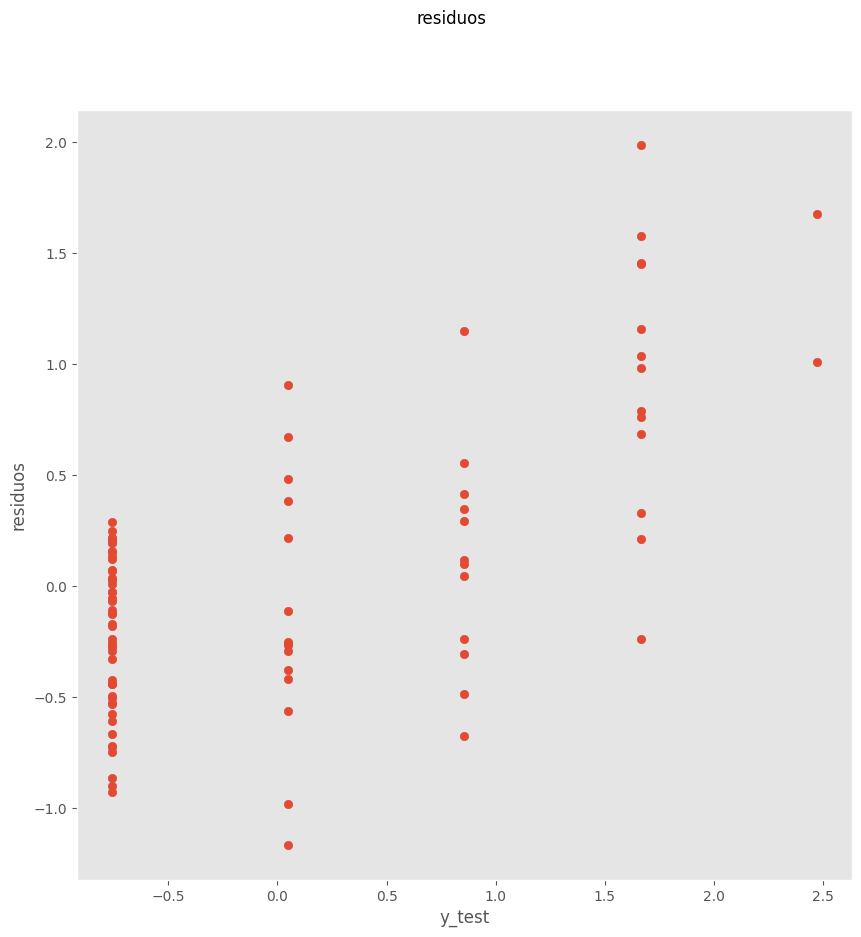

In [335]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('residuos')

plt.xlabel('y_test')

plt.ylabel('residuos')

plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))
plt.show()

VEMOS atal cosa

### PCA

In [336]:
# División de los datos en train y test

X = my_data.drop(columns='trestbps')
y = my_data['trestbps']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [337]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [338]:
RANDOM_STATE = 2

pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

X_pca.shape

(211, 10)

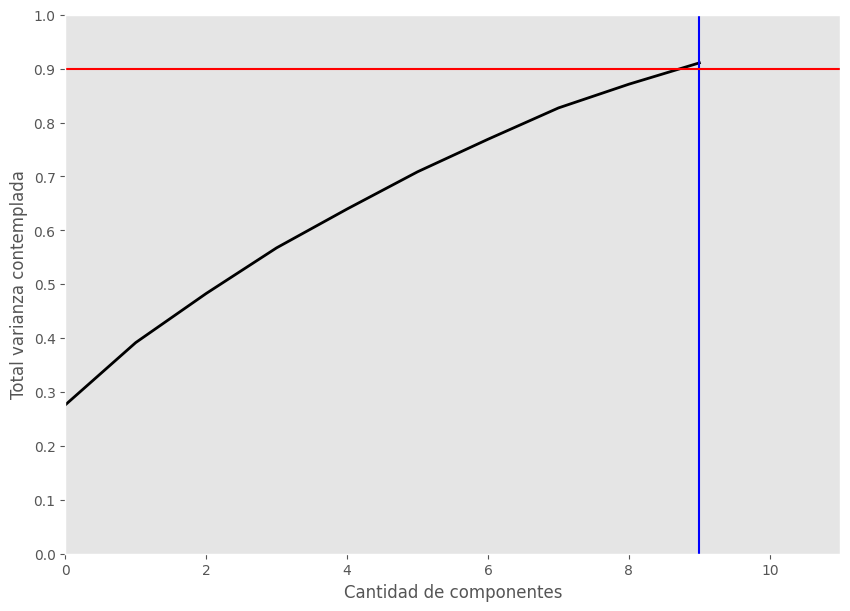

In [339]:
pca_2 = PCA(n_components=2, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(9, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [340]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

Text(0.5, 1.0, 'HAR - PCA projection 2D')

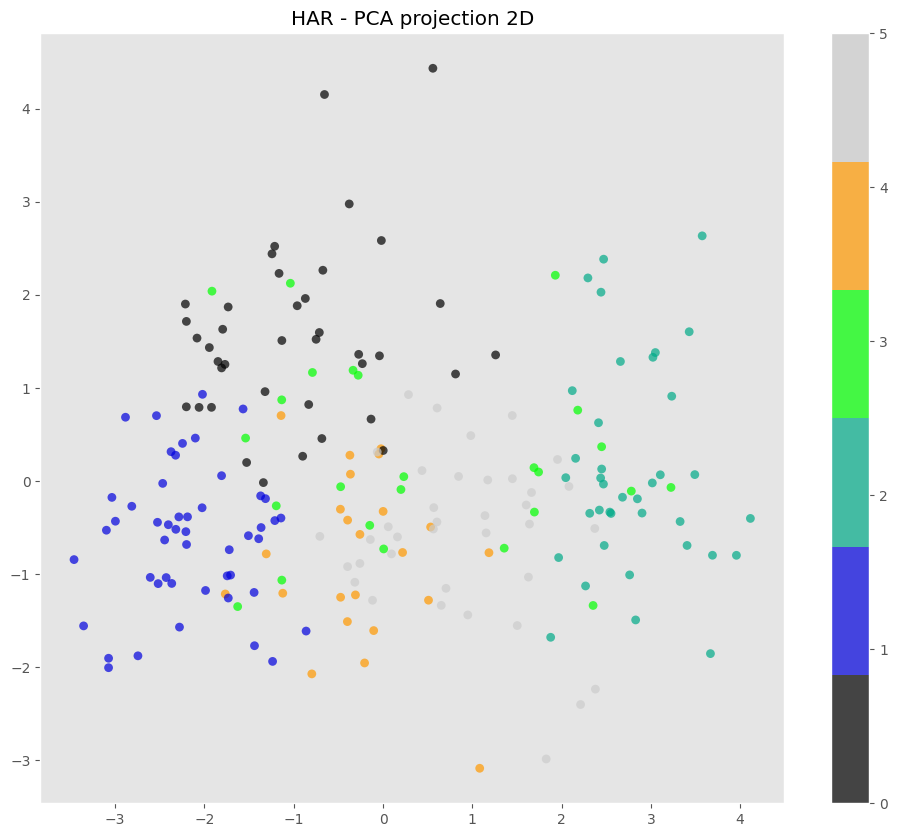

In [341]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D')

In [342]:
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_

Text(0.5, 1.0, 'HAR - PCA projection 2D')

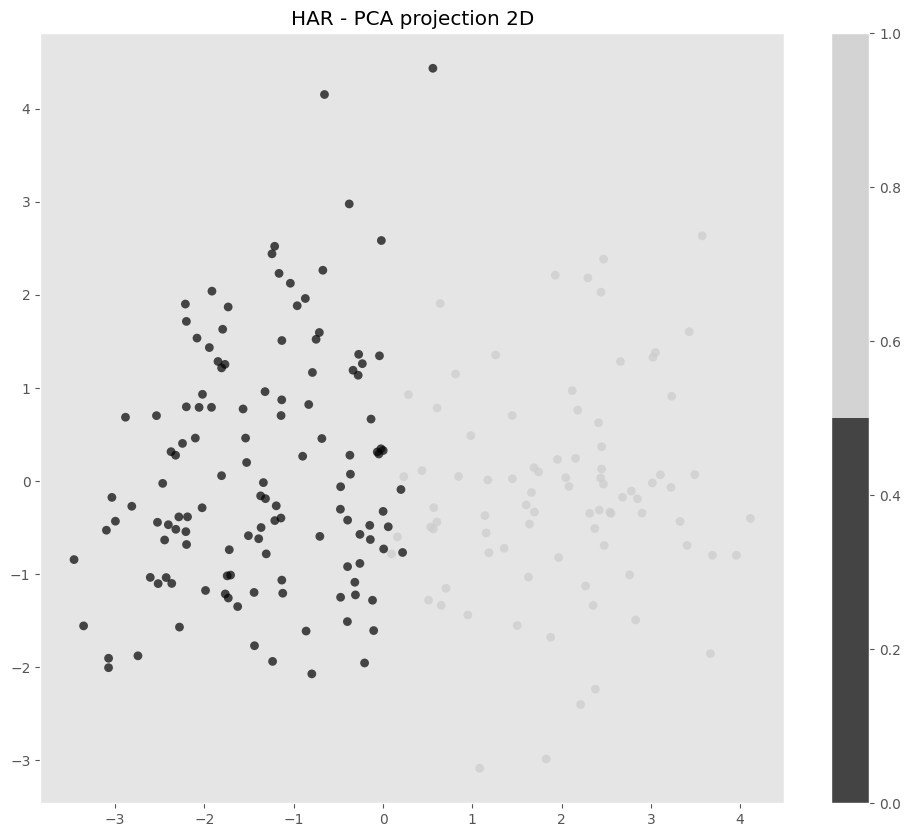

In [343]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D')

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [344]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

## ElastiNetCV

In [345]:
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 10, 200),
            #normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train.flatten())

In [346]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
90,0.00,9.011018e+00,291.269600,17.066622
89,0.00,1.135733e+01,291.302183,17.067577
91,0.00,7.149429e+00,291.319279,17.068078
88,0.00,1.431459e+01,291.428151,17.071267
92,0.00,5.672426e+00,291.445347,17.071770
...,...,...,...,...
1030,0.95,9.658832e+06,315.489296,17.762018
1025,0.95,3.072113e+07,315.489296,17.762018
1279,0.99,1.148951e+02,315.489301,17.762018
1079,0.95,1.148951e+02,315.490197,17.762044


Text(0, 0.5, 'rmse_cv')

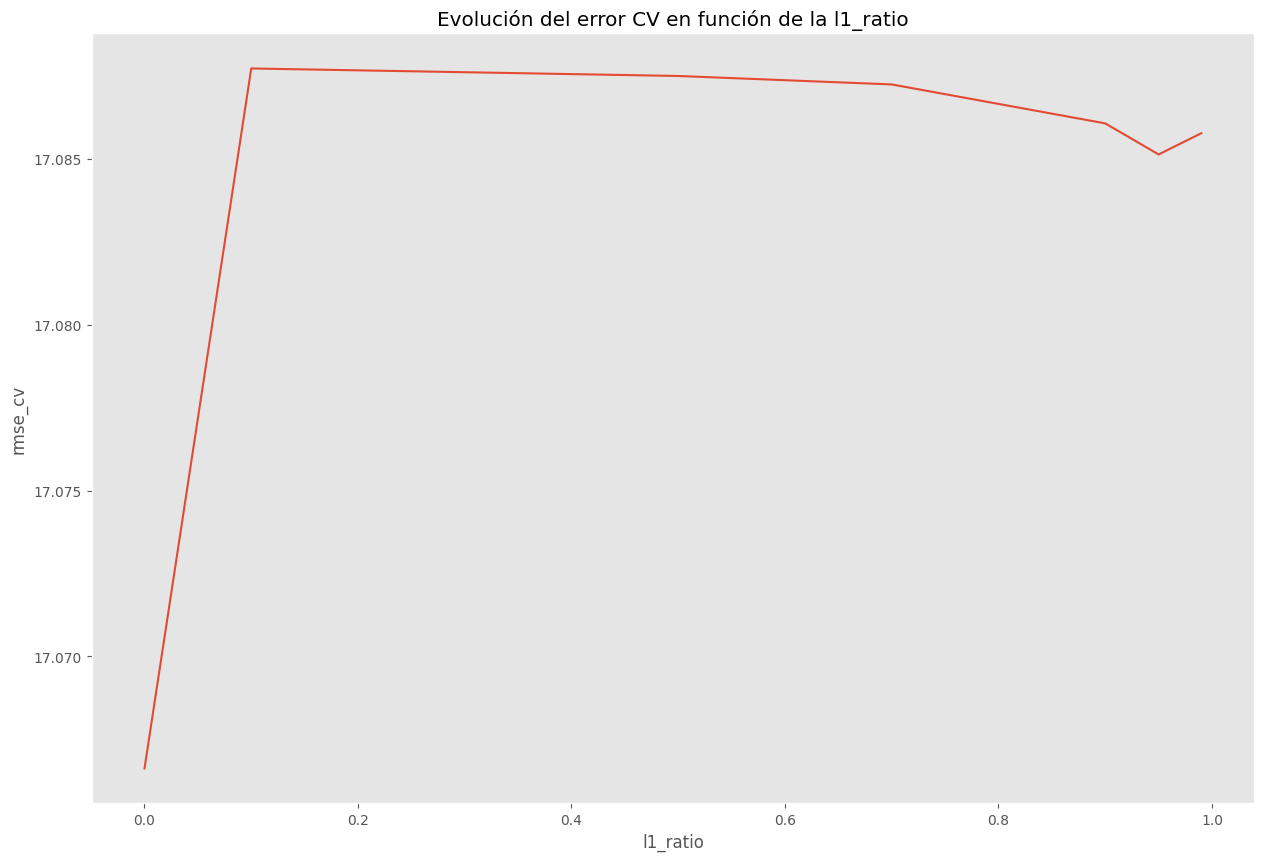

In [347]:
fig, ax = plt.subplots(figsize=(15, 10))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

In [348]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 9.011018251665037
Mejor valor de l1_ratio encontrado: 0.0


In [349]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

Text(0.5, 1.0, 'Parámetros del modelo')

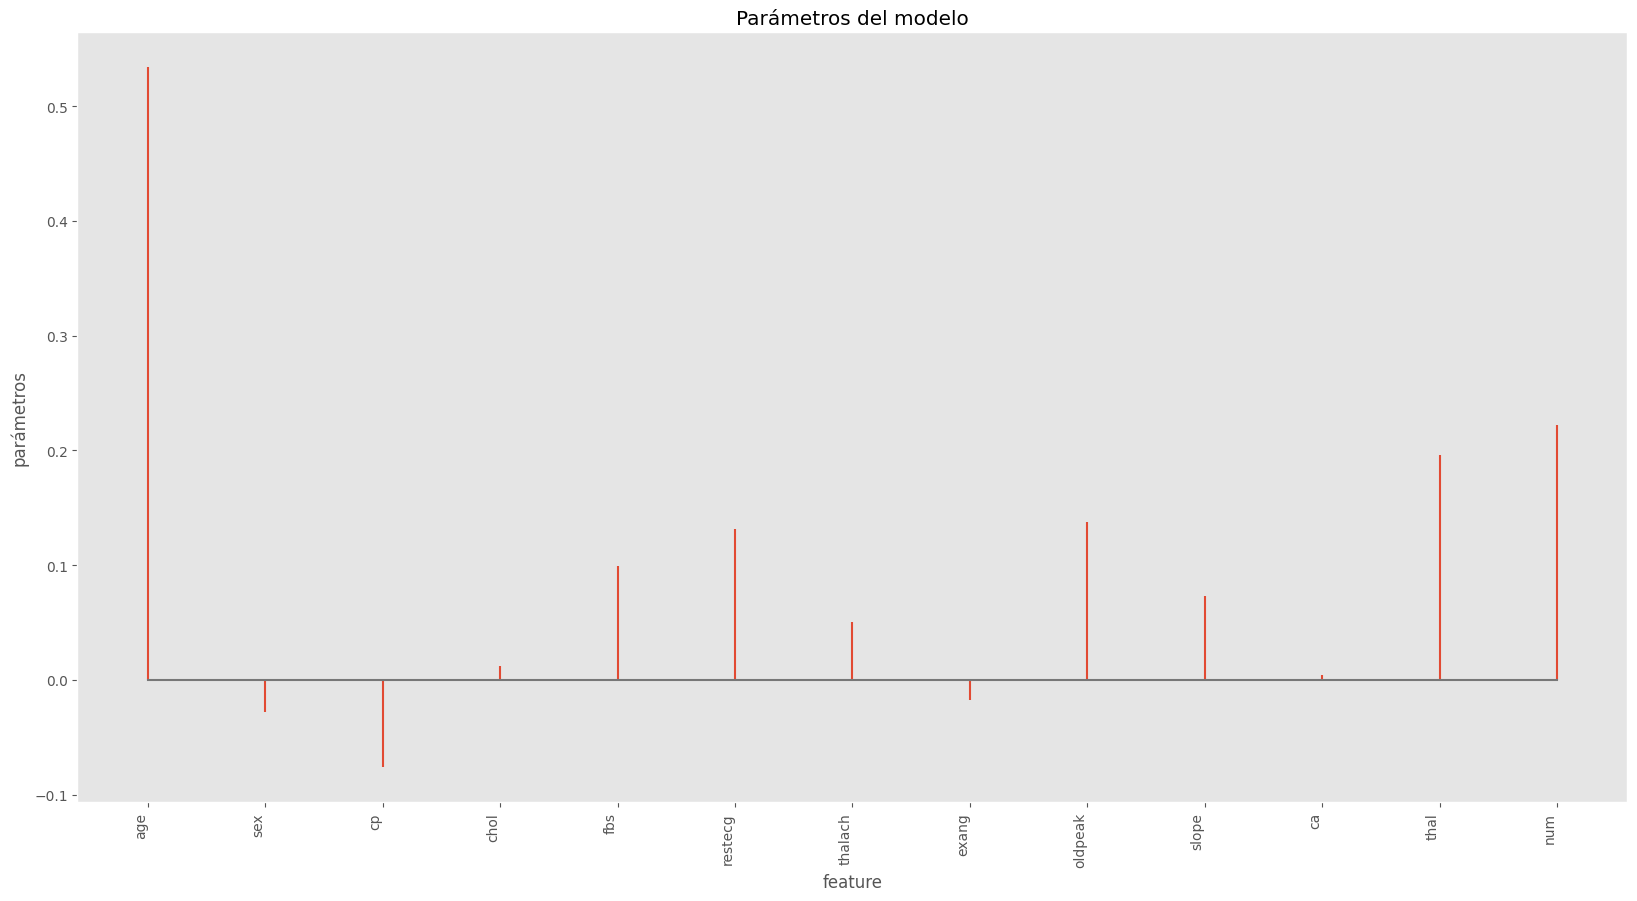

In [350]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo')

In [351]:
# Predicciones test

predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [352]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 16.47020850618507


In [353]:
R2 = metrics.r2_score(y_test, predicciones)
R2

0.09082474948261421

Text(0.5, 1.0, 'Comparación de modelos')

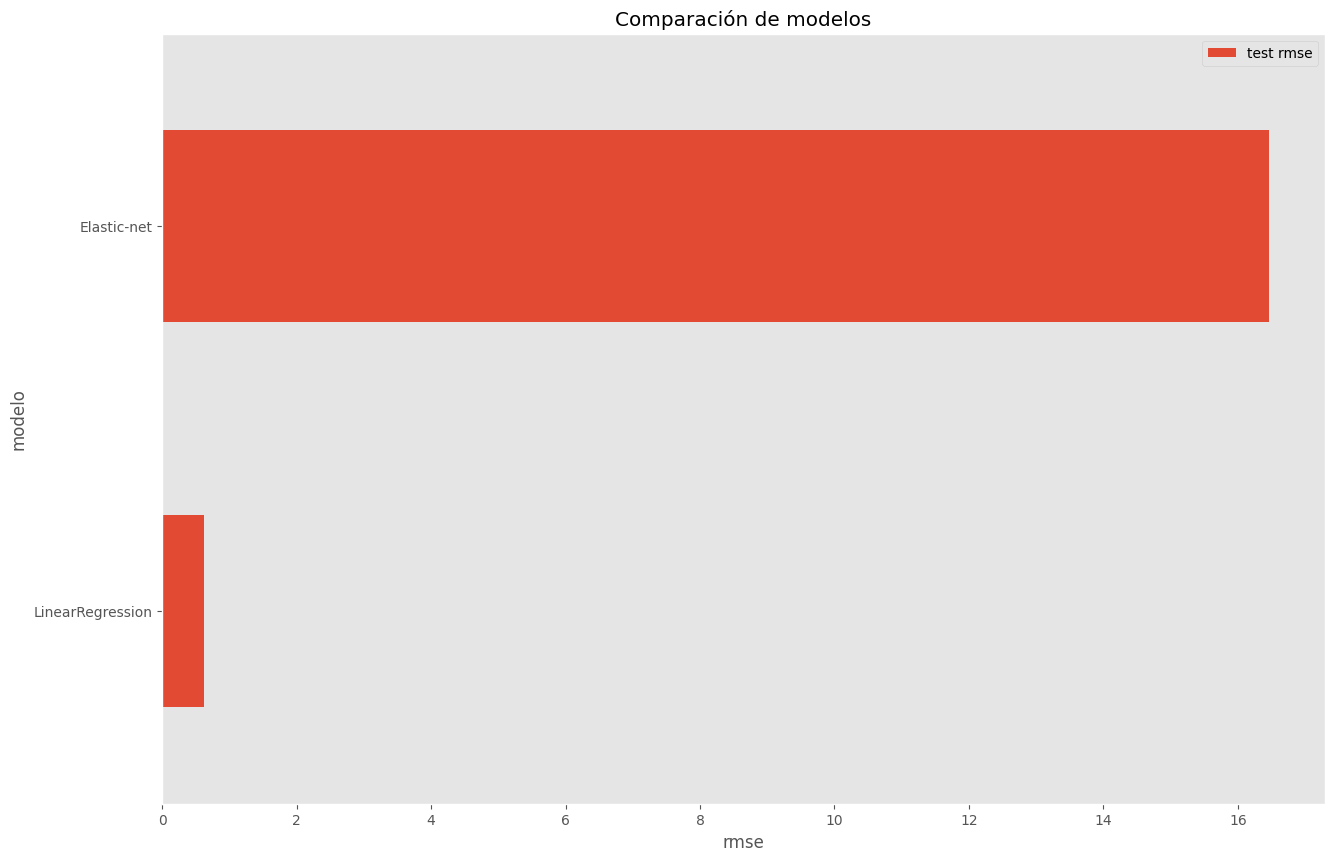

In [354]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos')